In [173]:
import pandas as pd

In [174]:
dataset = pd.read_csv('water_potability.csv')

In [175]:
list(dataset.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [176]:
dataset.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [178]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [179]:
dataset['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [180]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [181]:
dataset.fillna(dataset.mean(),inplace=True)

In [182]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [247]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [248]:
x["Solids_Hardness_Orani"] = (x['Solids'] / x['Hardness'])

In [249]:
x["Conductivity_Sulfate"] = (x['Conductivity'] / x['Sulfate'])

In [250]:
x["Chloramines_Turbidity_Orani"] = (x['Chloramines'] / x['Turbidity'])

In [251]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,101.475293,1.531298,2.463678
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,143.947129,1.776298,1.474284
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,88.788235,1.254154,3.035368
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,102.710588,1.017878,1.741139
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,99.275740,1.284634,1.606498


In [252]:
columns_to_normalize = list(x.columns)

In [220]:
min_values = x[columns_to_normalize].min()
max_values = x[columns_to_normalize].max()

In [253]:
normalized_data = (x[columns_to_normalize] - min_values) / (max_values - min_values)

In [254]:
normalized_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.198287,0.270135,0.409513
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.282371,0.337118,0.239577
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.173169,0.194364,0.507705
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.200732,0.129767,0.285412
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.193932,0.202698,0.262286


In [255]:
pearson_korelasyon = x.corr(method='pearson')
pearson_korelasyon

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.071894,0.007566,-0.001179
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.449176,0.022463,-0.010147
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.881045,0.099698,-0.053191
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,-0.049413,-0.025397,0.691728
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.084701,-0.520206,0.020693
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,0.022344,0.841657,-0.021380
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,0.005649,-0.001262,0.007654
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,-0.005497,0.015588,0.023137
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.020297,0.012512,-0.666965
Solids_Hardness_Orani,-0.071894,-0.449176,0.881045,-0.049413,-0.084701,0.022344,0.005649,-0.005497,0.020297,1.000000,0.074897,-0.041786


In [256]:
spearman_korelasyon = x.corr(method='spearman')
spearman_korelasyon

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
ph,1.000000,0.106929,-0.063675,-0.036997,0.022249,0.013797,0.038681,0.006284,-0.046972,-0.104475,0.004561,0.005980
Hardness,0.106929,1.000000,-0.052584,-0.024556,-0.073857,-0.032884,0.003340,-0.010295,-0.012855,-0.398610,0.018422,-0.013260
Solids,-0.063675,-0.052584,1.000000,-0.055037,-0.130586,0.021089,0.017881,-0.018985,0.028470,0.919800,0.077161,-0.063942
Chloramines,-0.036997,-0.024556,-0.055037,1.000000,0.026533,-0.016928,-0.011910,0.017682,-0.007909,-0.028855,-0.030585,0.726513
Sulfate,0.022249,-0.073857,-0.130586,0.026533,1.000000,-0.016552,0.012287,-0.020319,-0.016757,-0.101911,-0.443185,0.029806
Conductivity,0.013797,-0.032884,0.021089,-0.016928,-0.016552,1.000000,0.021311,-0.004260,0.010342,0.029688,0.877780,-0.023057
Organic_carbon,0.038681,0.003340,0.017881,-0.011910,0.012287,0.021311,1.000000,-0.007326,-0.024730,0.010135,0.005713,0.001596
Trihalomethanes,0.006284,-0.010295,-0.018985,0.017682,-0.020319,-0.004260,-0.007326,1.000000,-0.027047,-0.009502,0.013199,0.028709
Turbidity,-0.046972,-0.012855,0.028470,-0.007909,-0.016757,0.010342,-0.024730,-0.027047,1.000000,0.031281,0.015942,-0.644934
Solids_Hardness_Orani,-0.104475,-0.398610,0.919800,-0.028855,-0.101911,0.029688,0.010135,-0.009502,0.031281,1.000000,0.065630,-0.045370


In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

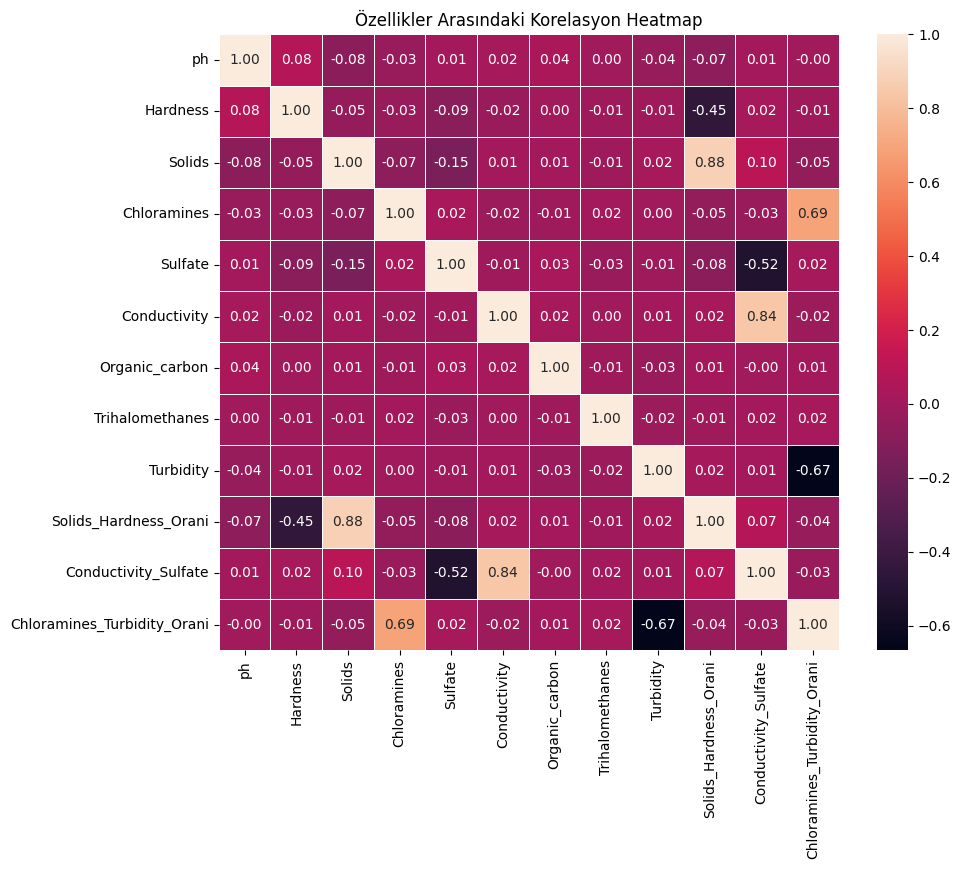

In [258]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_korelasyon, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

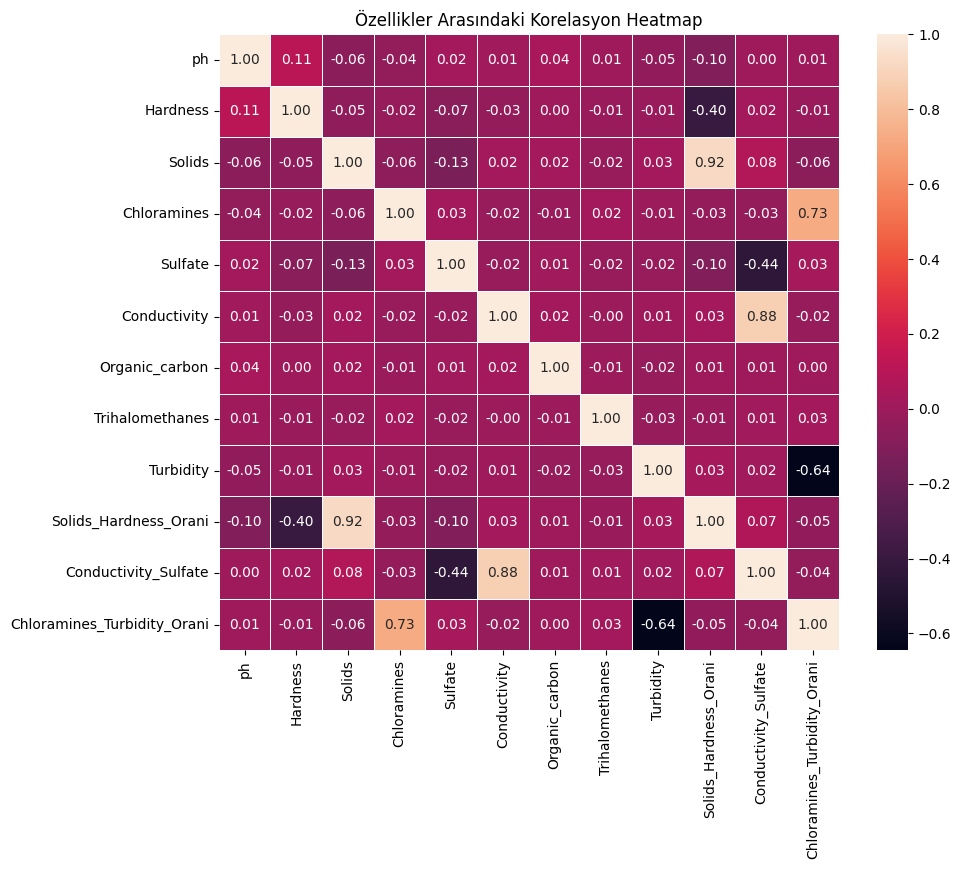

In [259]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_korelasyon, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

In [260]:
x['Potability'] = y

In [240]:
purple ='#2d023d'
ten = '#ffd4aa'
sns.pairplot(x,
             hue = 'Potability',
             palette= [ten, purple],)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [261]:
x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Solids_Hardness_Orani', 'Conductivity_Sulfate',
       'Chloramines_Turbidity_Orani', 'Potability'],
      dtype='object')

In [262]:
x = x.drop(['Conductivity_Sulfate','Chloramines_Turbidity_Orani','Solids_Hardness_Orani'],axis=1)

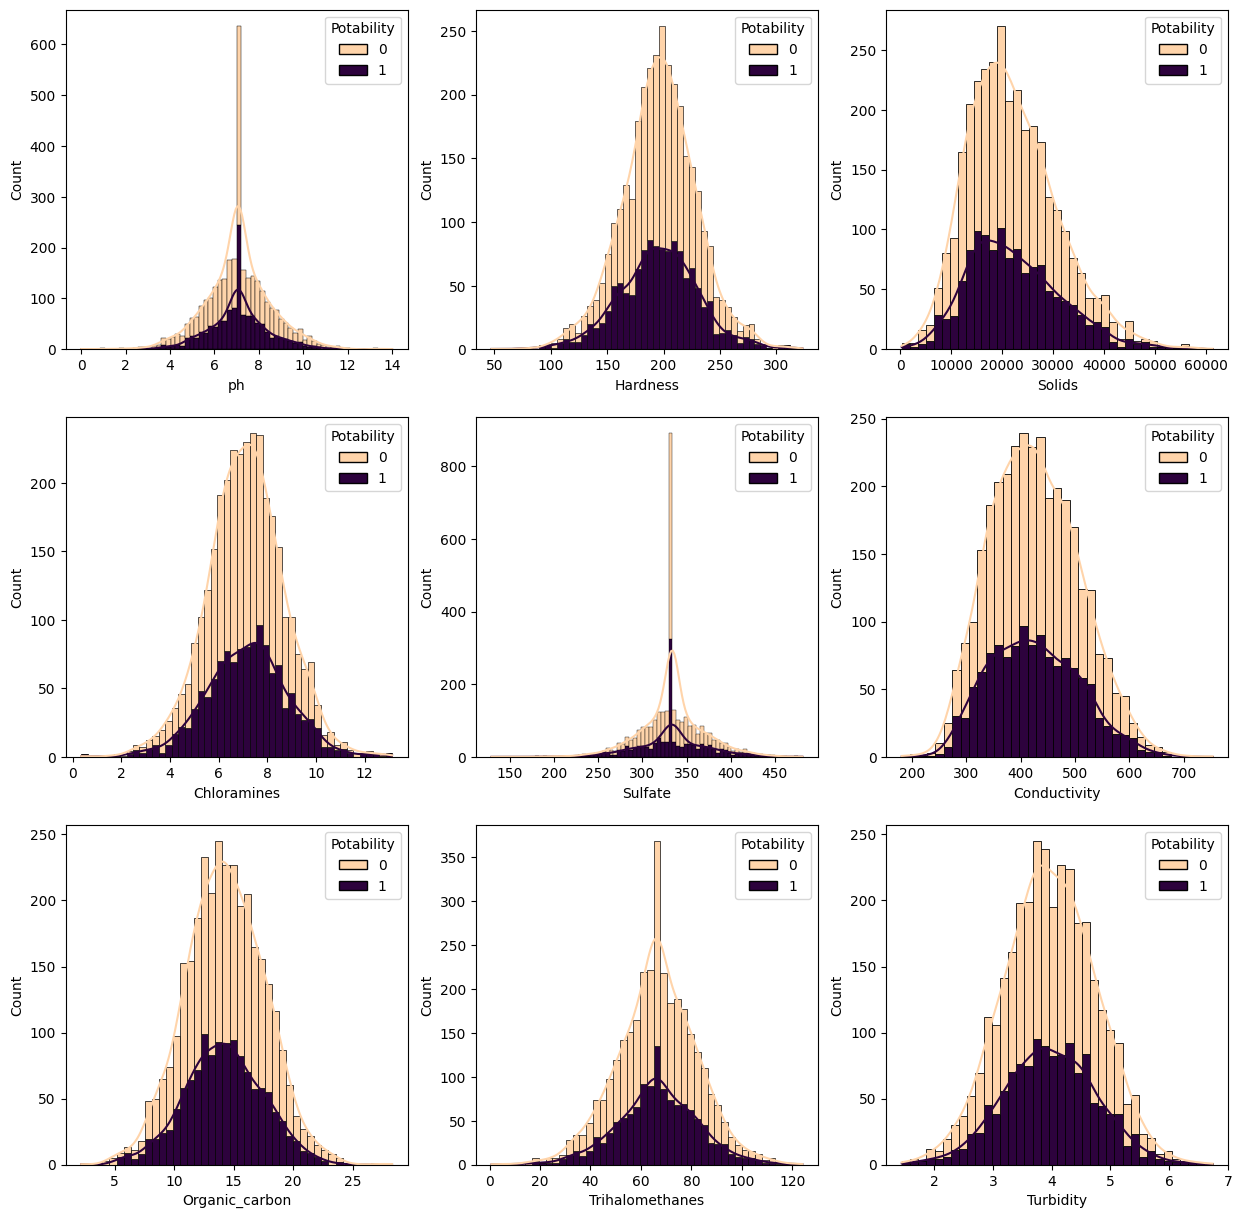

In [275]:
plotter_dataset = dataset.drop('Potability', axis=1)
plt.figure(figsize = (15, 15))
for i in enumerate(list(dataset.columns[:-1])):
    plt.subplot(3, 3,i[0]+1)
    sns.histplot(
        data = plotter_dataset ,
        x = plotter_dataset[i[1]],
        hue = dataset['Potability'],
        palette= [ten, purple],
        kde = True,
        multiple='stack',
        alpha=1
    )

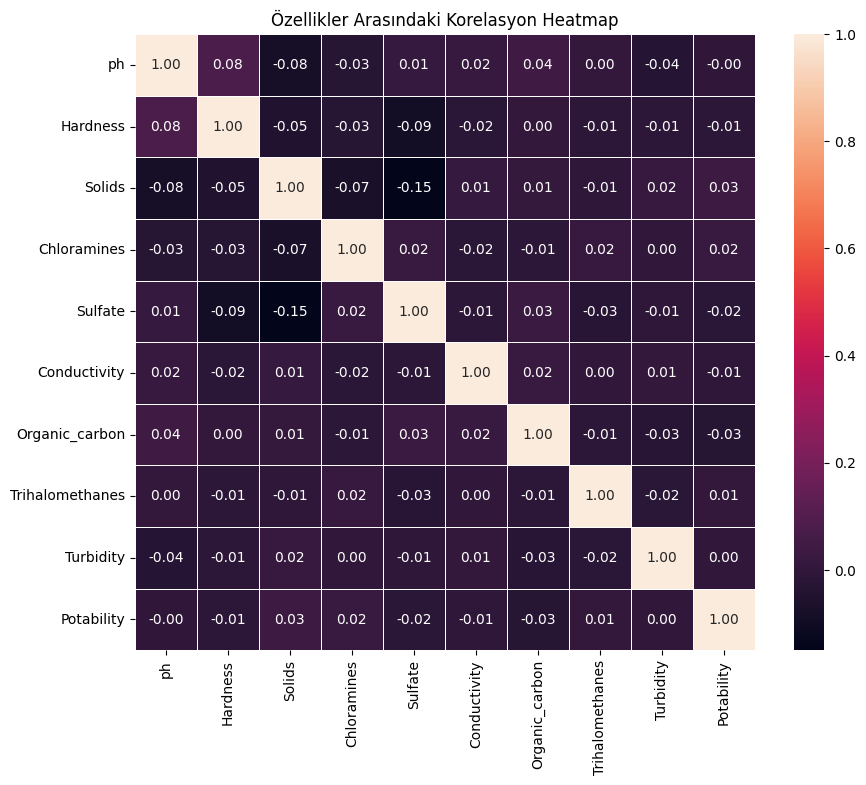

In [272]:
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

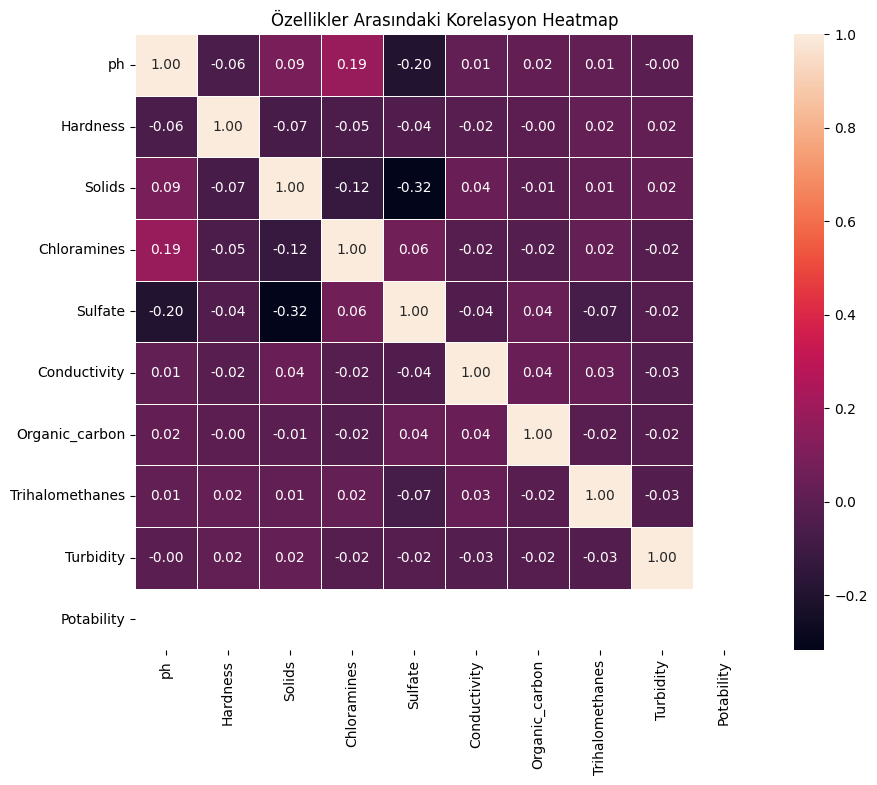

In [270]:
xicilebilir = x[x['Potability'] == 1]
plt.figure(figsize=(10, 8))
sns.heatmap(xicilebilir.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()